# Zomato Restaurant Analytics & Recommender System

This project explores a dataset of restaurants listed on Zomato and performs:
- Exploratory Data Analysis (EDA)
- Data Cleaning
- Feature Engineering
- Insights Visualization
- A simple Recommender System

Dataset: ~50,000 restaurants  
Tools: Python, Pandas, Matplotlib, Seaborn, NLP, Scikit-learn

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



## Reading CSV

In [2]:
import pandas as pd
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Removing unimportant columns from given Dataset.

In [5]:
df = df.drop(['url', 'address', 'phone', 'dish_liked', 'menu_item', 'reviews_list'], axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


## Dropping Duplicates

In [7]:
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

## Cleaning Rate Column

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### Remove "NEW", "-", and "/5" from Rate Column

In [9]:
def handle_rate(value):
    if(value == "NEW" or value == "-"):
        return np.nan
    else:
        value = str(value).split("/")
        value = value[0]
        return float(value)

df['rate'] = df['rate'].apply(handle_rate)
df['rate'].head()
    

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

## Filling Null Values with Rate Column with Mean

In [10]:
df.rate.isnull().sum()

np.int64(10019)

In [11]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


## Dropping Null Values

In [13]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### Renaming Few Columns

In [14]:
df.rename(columns = {"approx_cost(for two people)":"Cost2Plates", "listed_in(type)":"Type", "listed_in(city)":"City"}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [15]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [16]:
df['City'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

## Listed City and Location, both are there, lets keep only one

In [17]:
df = df.drop(['City'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [18]:
df['Cost2Plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

### Removing "," from Cost2Plates Column

In [19]:
def handle_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',',' ')
        return value
        
    else:
        return value

df['Cost2Plates'] = df['Cost2Plates'].apply(handle_comma)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


## Data Cleaning

## Cleaning Rest Type Columns

In [20]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [21]:
rest_types = df['rest_type'].value_counts(ascending = False)

In [22]:
rest_type_lessthan1000 = rest_types[rest_types < 1000]
rest_type_lessthan1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: count, Length: 85, dtype: int64

### Making Rest Types less than 1000 in frequency as others

In [23]:
def handle_the_rest(value):
    if( value in rest_type_lessthan1000):
        return 'others'
    else:
        return value

df['rest_type'] = df['rest_type'].apply(handle_the_rest)
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

## Cleaning Location Column

In [24]:
location = df['location'].value_counts(ascending = False)

location_lessthan300 = location[location < 300]

def handle_location(value):
    if( value in location_lessthan300):
        return 'others'
    else:
        return value

df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

## Cleaning Cuisines Column

In [25]:
cuisines = df['cuisines'].value_counts(ascending = False)

cuisines_lessthan100 = cuisines[cuisines < 100]

def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value

df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [26]:
df['Type'].value_counts()

Type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

## Data is Clean, Let's jump to Visualization

## Exploratory Data Analysis (EDA)
In this section, we analyze the Zomato dataset to uncover key insights and patterns in restaurant distribution, cuisine preferences, rating behavior, and other factors affecting the restaurant business.

### 1) Count Plot of Various Locations

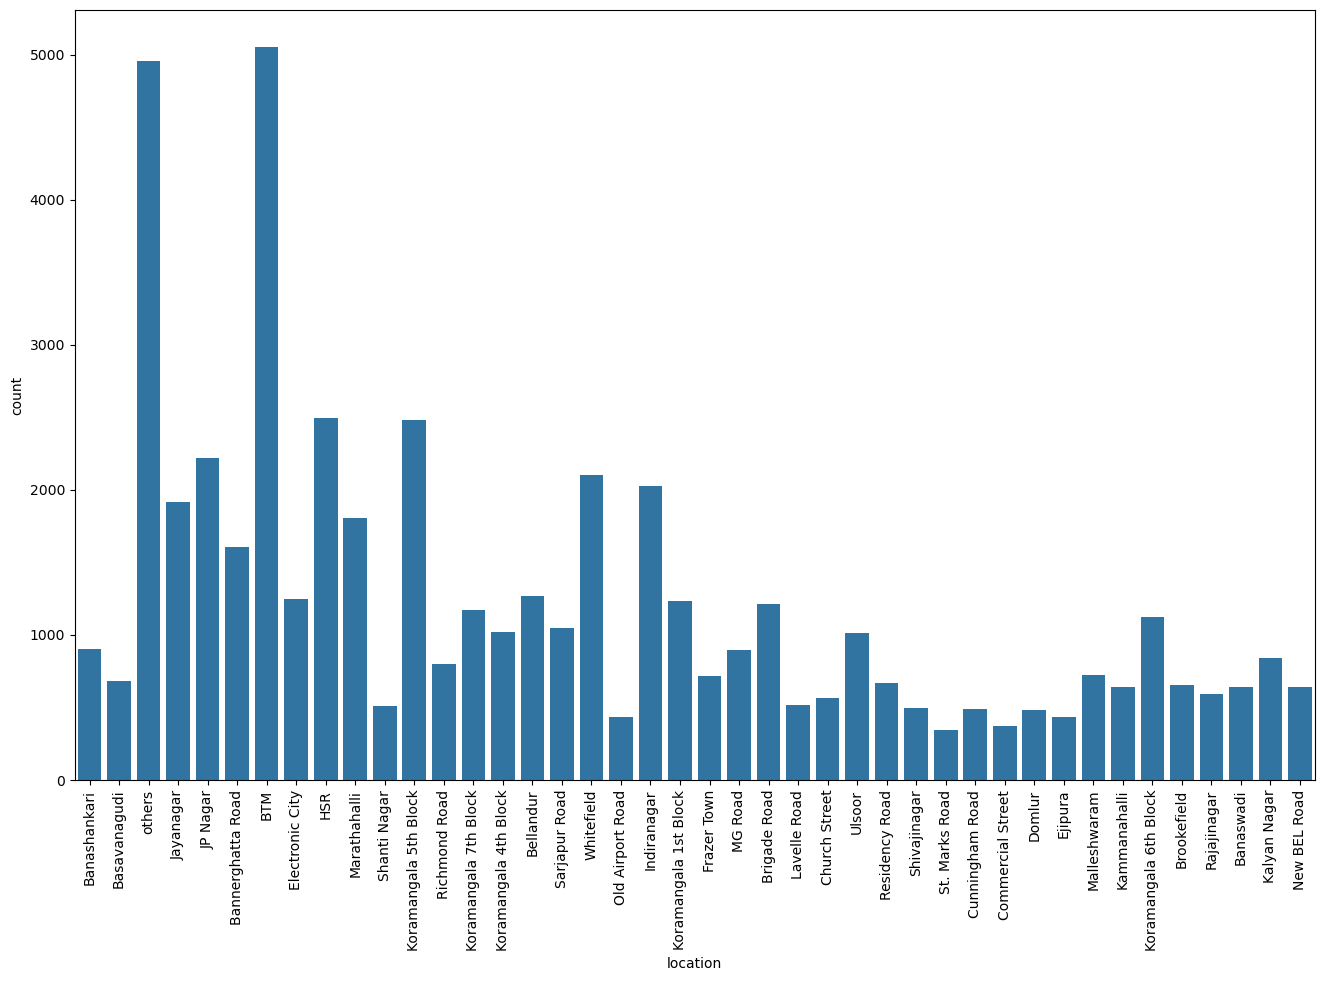

In [27]:
plt.figure(figsize=(16,10))
sns.countplot(x = 'location', data = df)
plt.xticks(rotation=90)
plt.show()

### 2) Visualizing Online Order

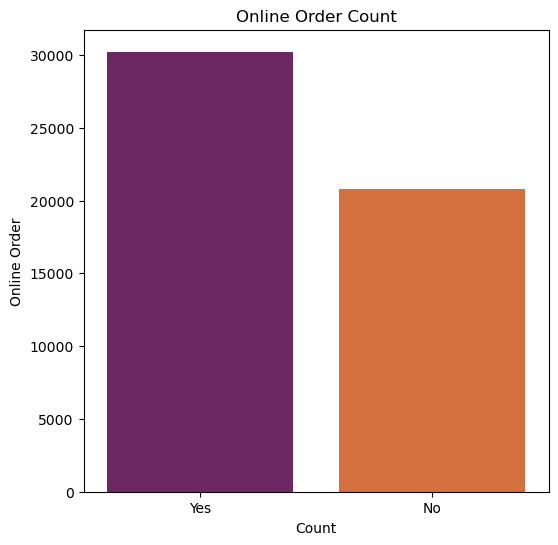

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'online_order', data = df, palette ='inferno')
plt.xlabel("Count")
plt.ylabel("Online Order")
plt.title("Online Order Count")
plt.show()


### 3) Visualizing Book Table

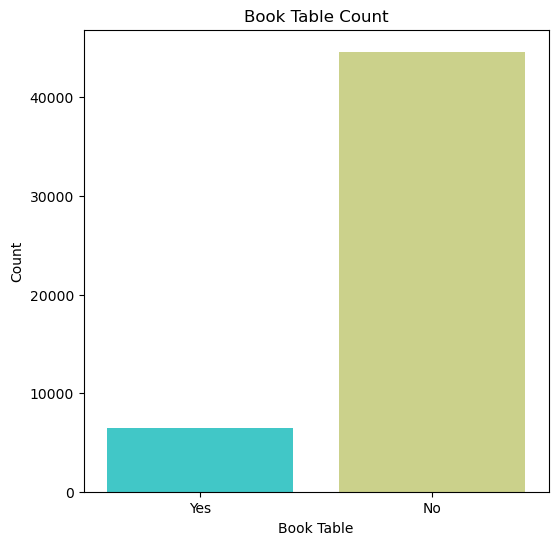

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'book_table', data = df, palette ='rainbow')
plt.xlabel("Book Table")
plt.ylabel("Count")
plt.title("Book Table Count")
plt.show()


### 4) Visualizing Online Order vs Rate

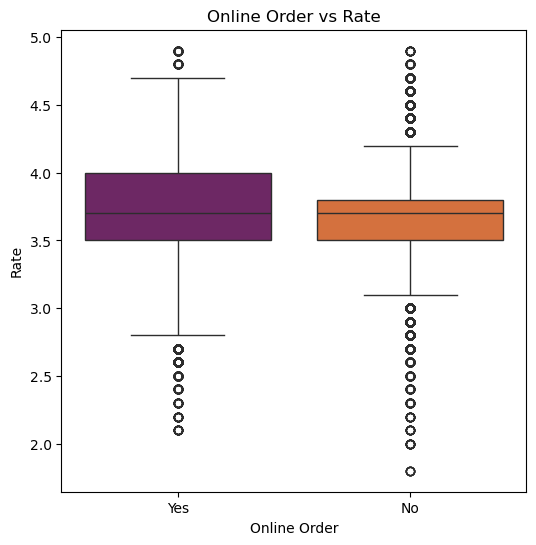

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y= 'rate', data = df, palette ='inferno')
plt.xlabel("Online Order")
plt.ylabel("Rate")
plt.title("Online Order vs Rate")
plt.show()


### 5) Visualizing Book Table vs Rate

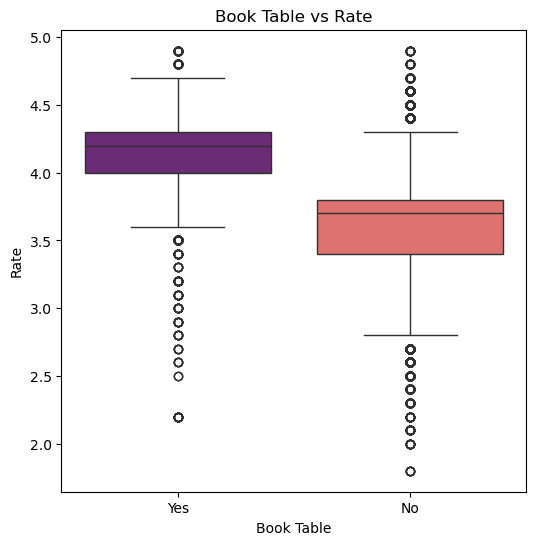

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'book_table', y= 'rate', data = df, palette ='magma')
plt.xlabel("Book Table")
plt.ylabel("Rate")
plt.title("Book Table vs Rate")
plt.show()

### 6) Visualizing Online Order Facility, Location Wise

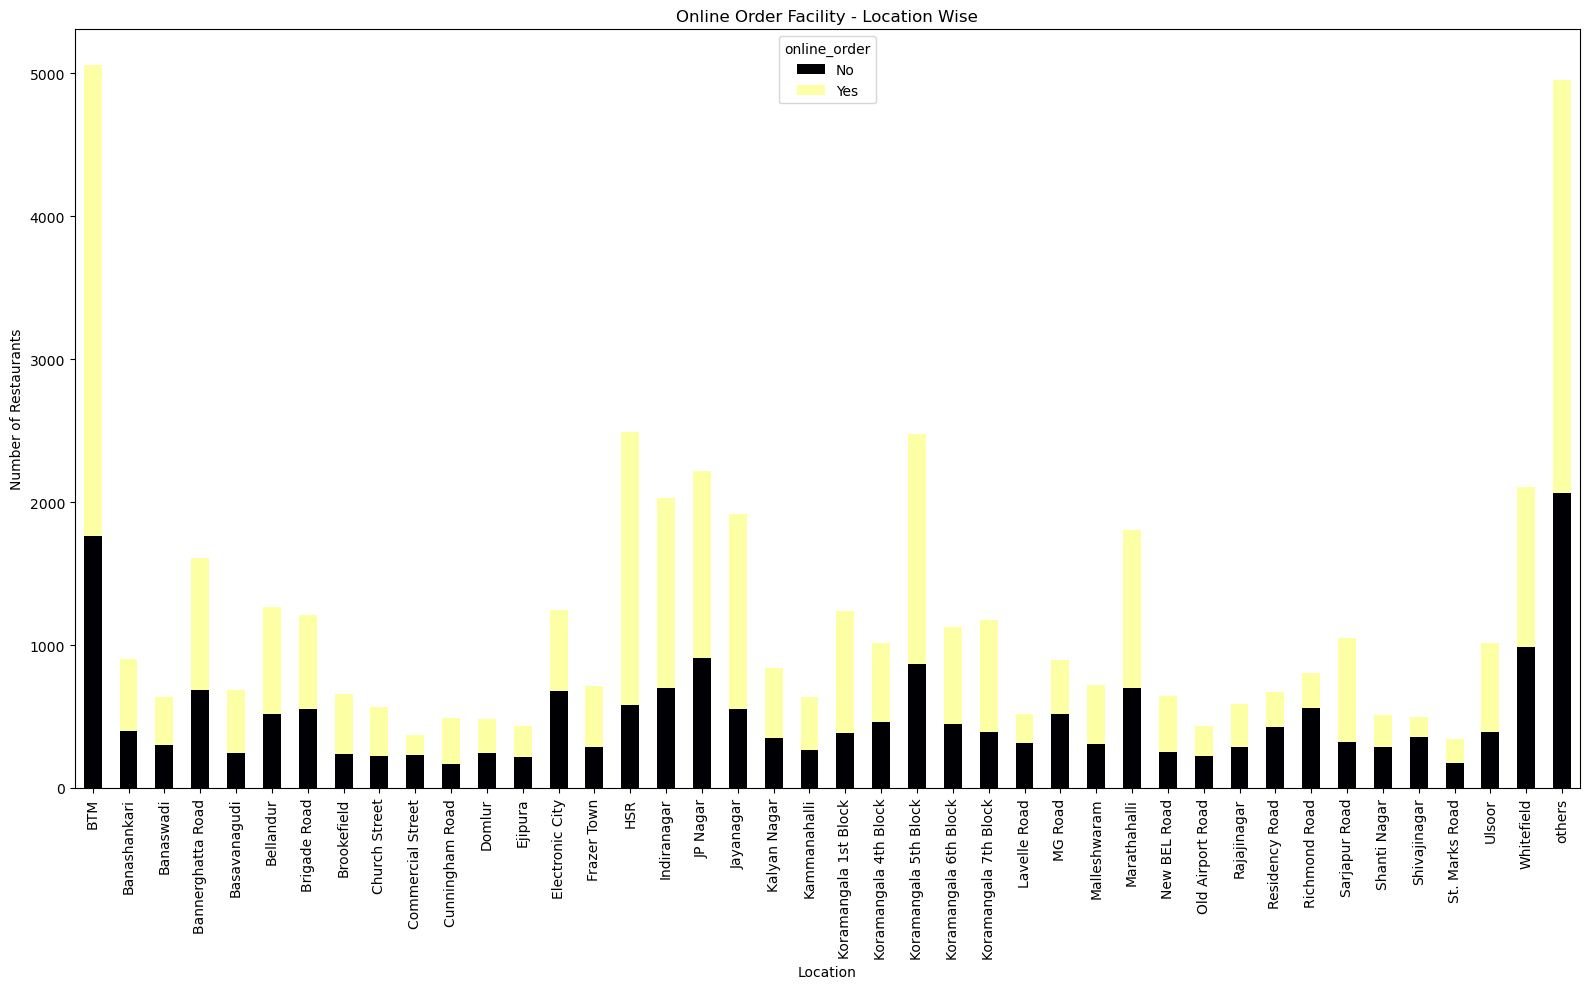

In [32]:

pivot_data = pd.pivot_table(df, index='location', columns='online_order', values='name', aggfunc='count', fill_value=0)

pivot_data.plot(kind='bar', stacked=True, figsize=(16,10), colormap='inferno')

plt.title("Online Order Facility - Location Wise")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
pivot_table = pd.pivot_table(df, index='location', columns='online_order', values='name', aggfunc='count', fill_value=0)
pivot_table

online_order,No,Yes
location,,
BTM,1763,3293
Banashankari,397,505
Banaswadi,302,338
Bannerghatta Road,685,924
Basavanagudi,243,441
Bellandur,517,751
Brigade Road,552,658
Brookefield,239,417
Church Street,226,340


### 7) Visualizing Book Table Facility, Location Wise

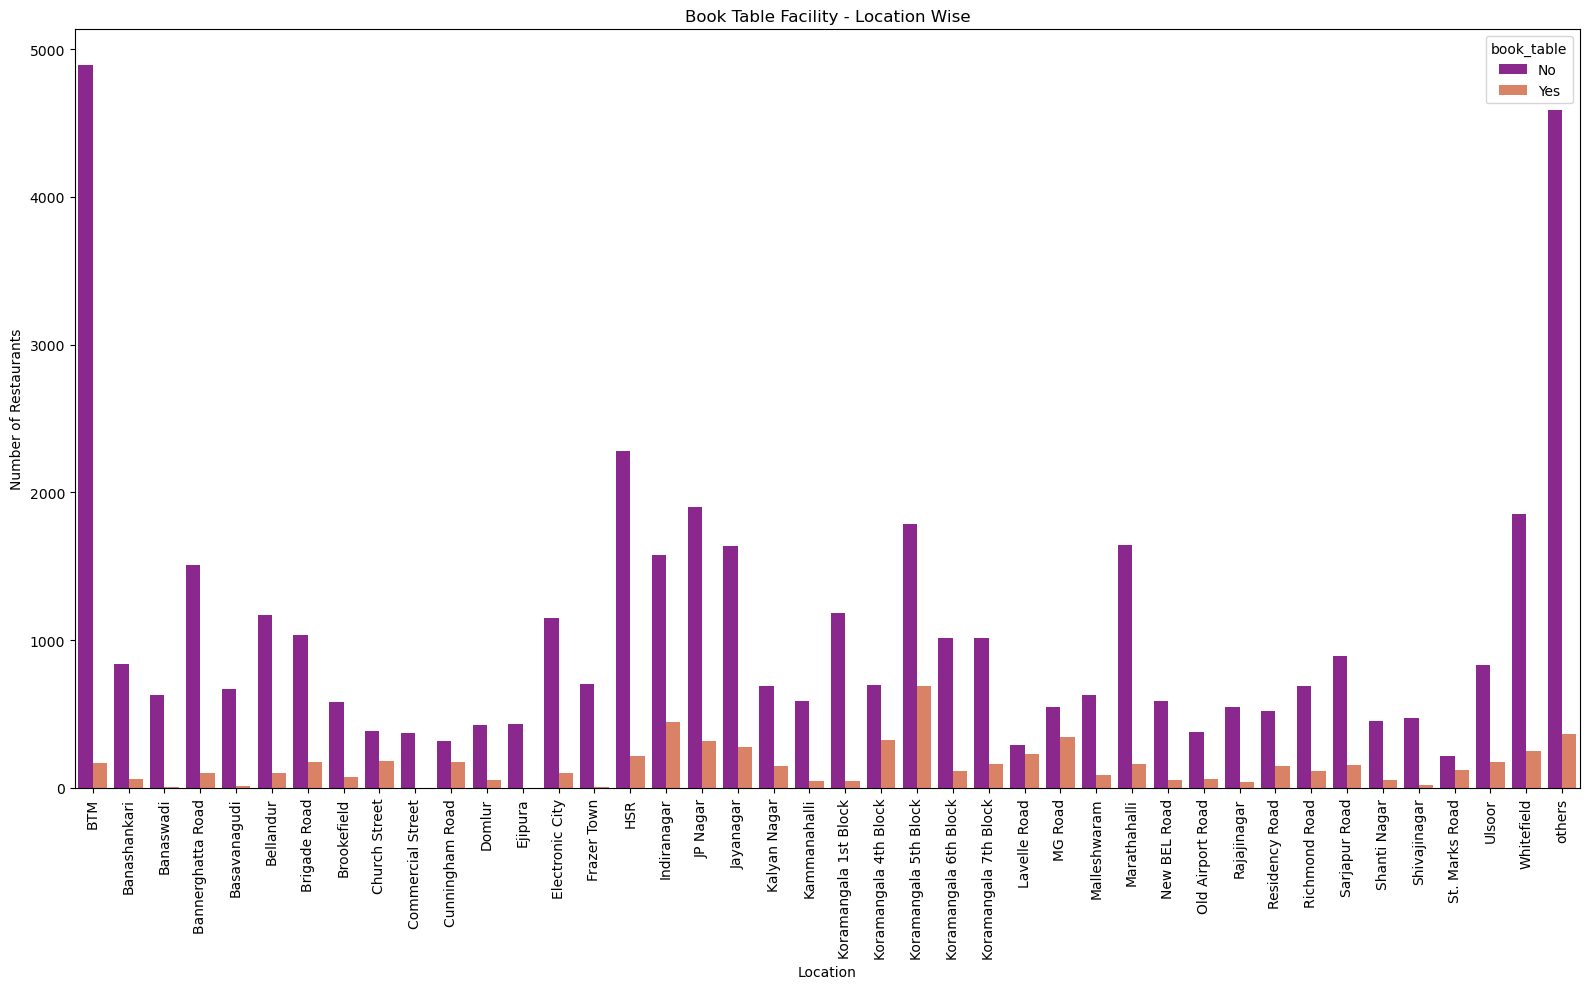

In [34]:

data = df.groupby(['location','book_table'])['name'].count().reset_index()
plt.figure(figsize = (16,10))
sns.barplot(data=data, x='location', y='name', hue='book_table', palette='plasma')

plt.title("Book Table Facility - Location Wise")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 8) Visualizing Types of Restaurents vs Rate

<Axes: xlabel='Type', ylabel='rate'>

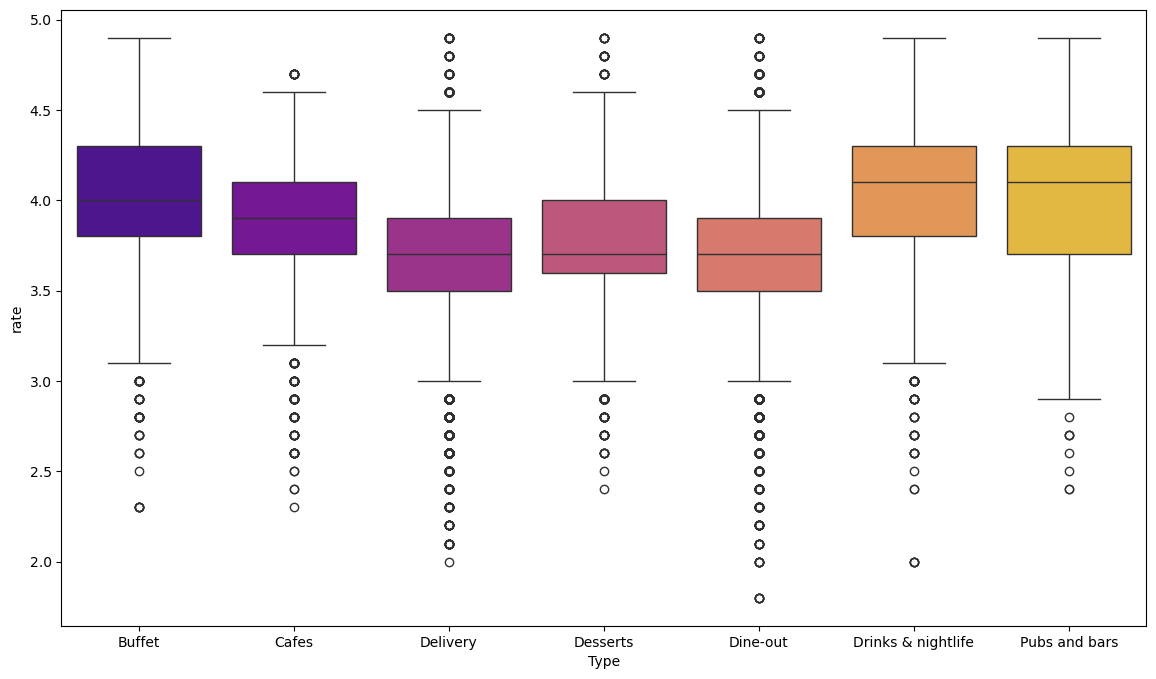

In [35]:
plt.figure(figsize = (14,8))
sns.boxplot(data=df, x='Type', y='rate', palette='plasma')

### 9) Grouping Types of Restaurants, Location Wise

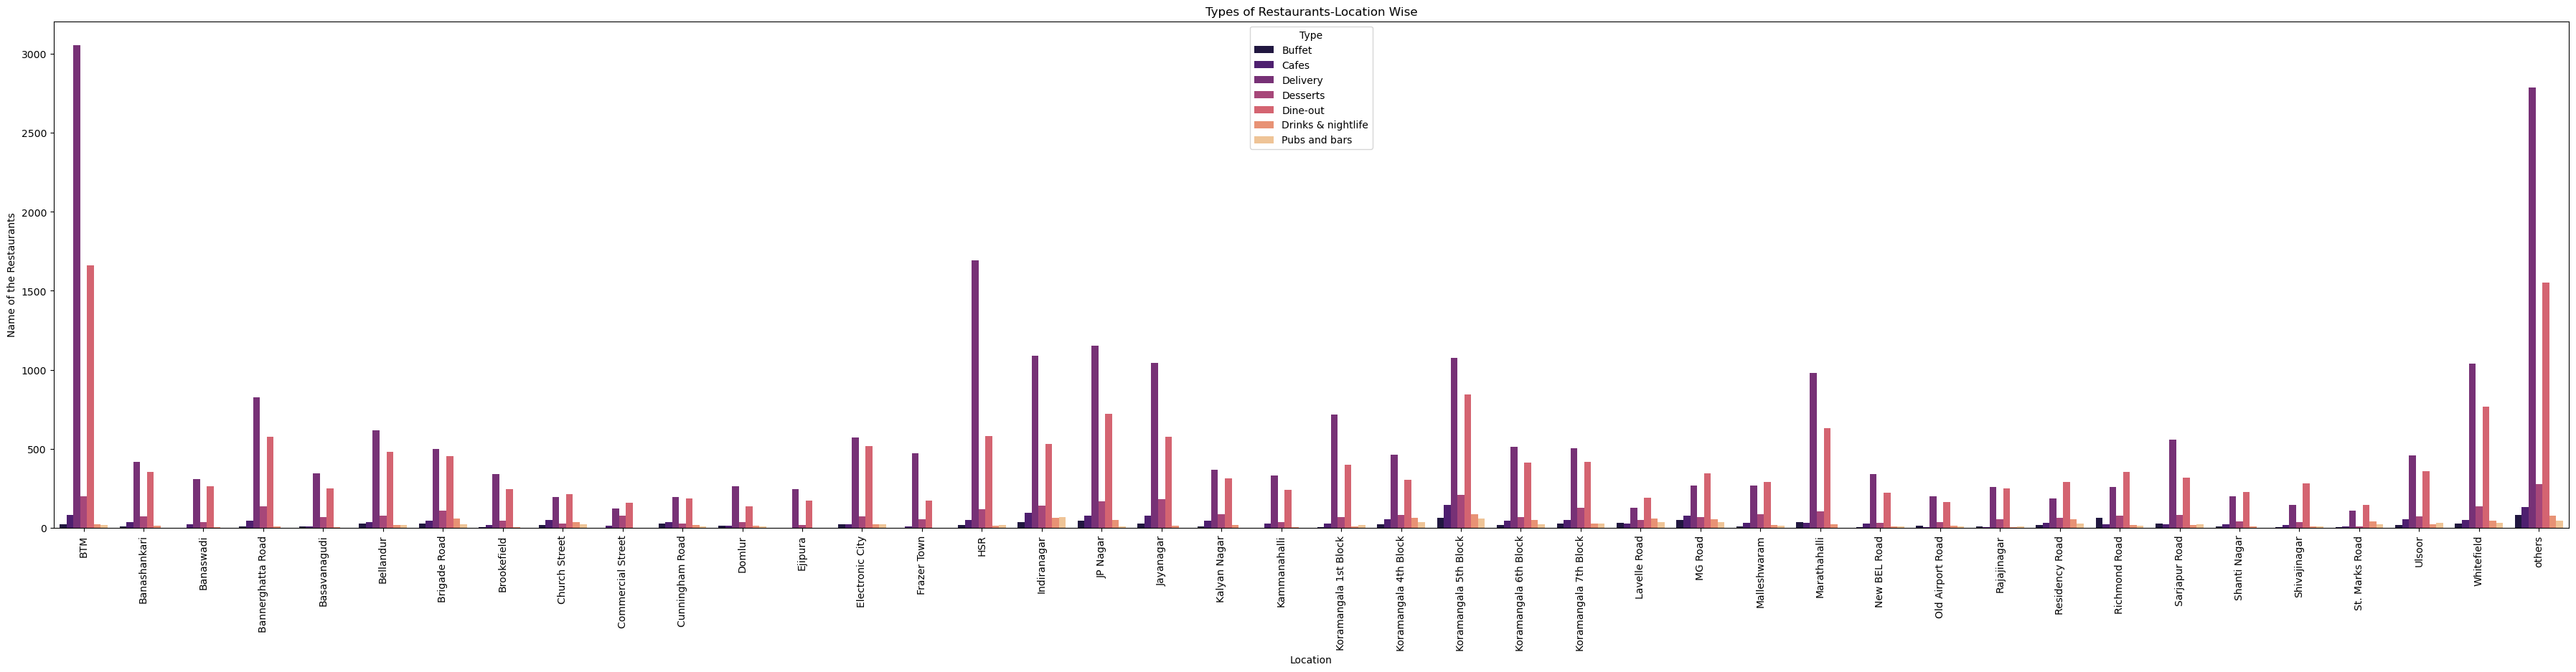

In [36]:
data = df.groupby(['location','Type'])['name'].count().reset_index()
plt.figure(figsize = (36,8))
sns.barplot(data=data, x = 'location', y= 'name', hue = 'Type', palette = 'magma')
plt.title("Types of Restaurants-Location Wise")
plt.xlabel("Location")
plt.ylabel("Name of the Restaurants")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


### 10) Visualizing No.of Votes, Location Wise

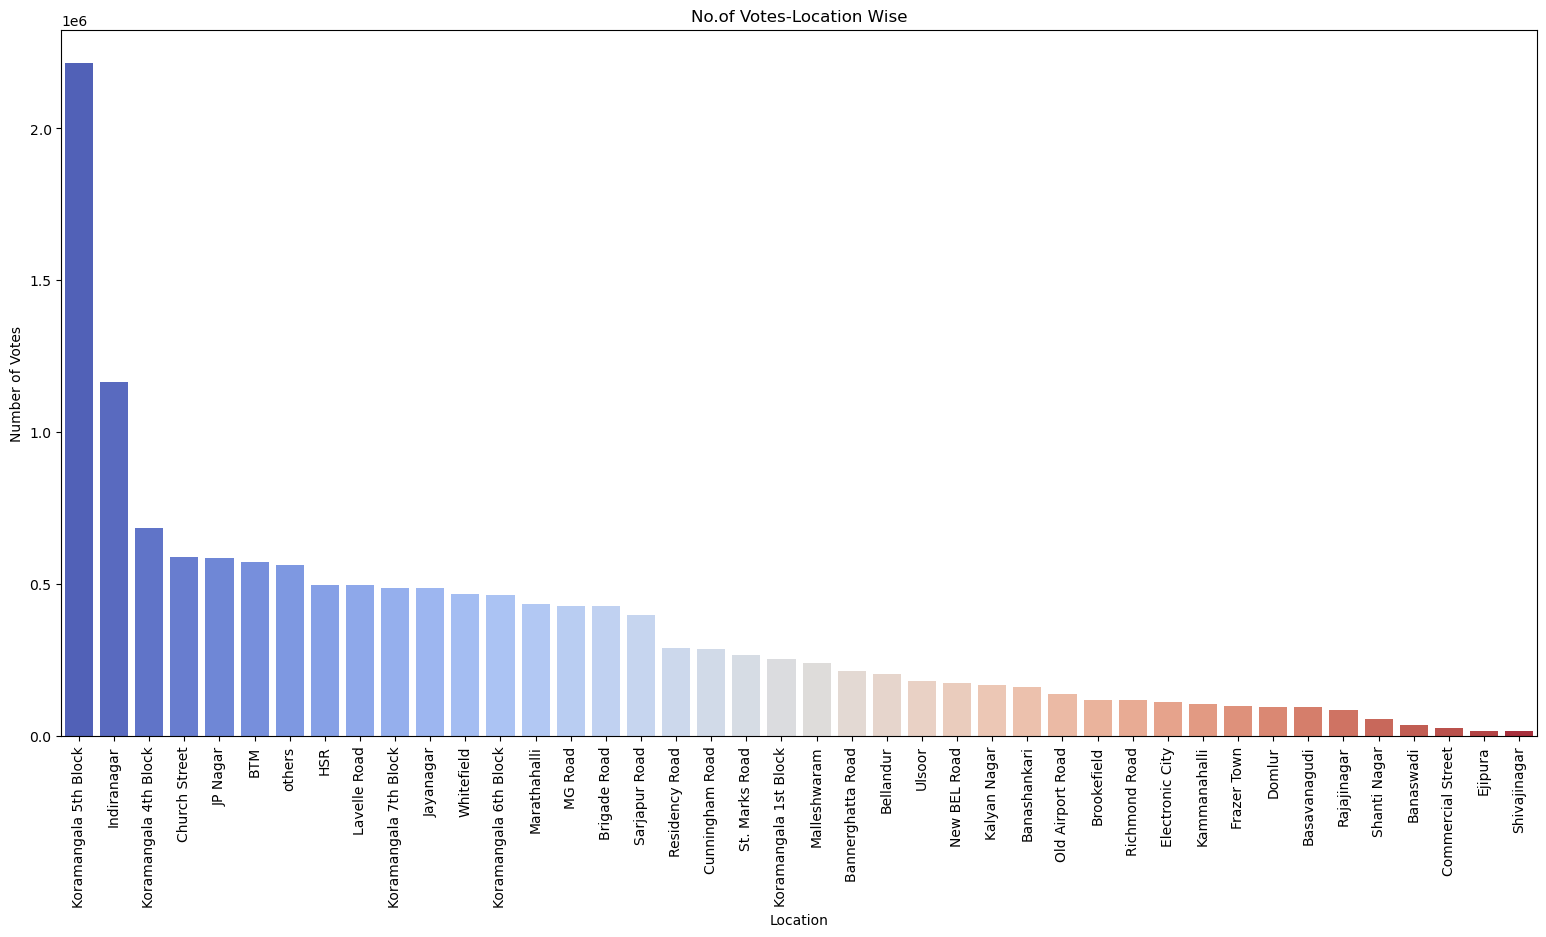

In [37]:
data = df.groupby('location')['votes'].sum().reset_index()
data = data.sort_values('votes', ascending=False)

plt.figure(figsize = (16,8))
sns.barplot(data=data, x = 'location', y= 'votes', palette = 'coolwarm')
plt.title("No.of Votes-Location Wise")
plt.xlabel("Location")
plt.ylabel("Number of Votes")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


### 11) Visualizing Top Cuisines

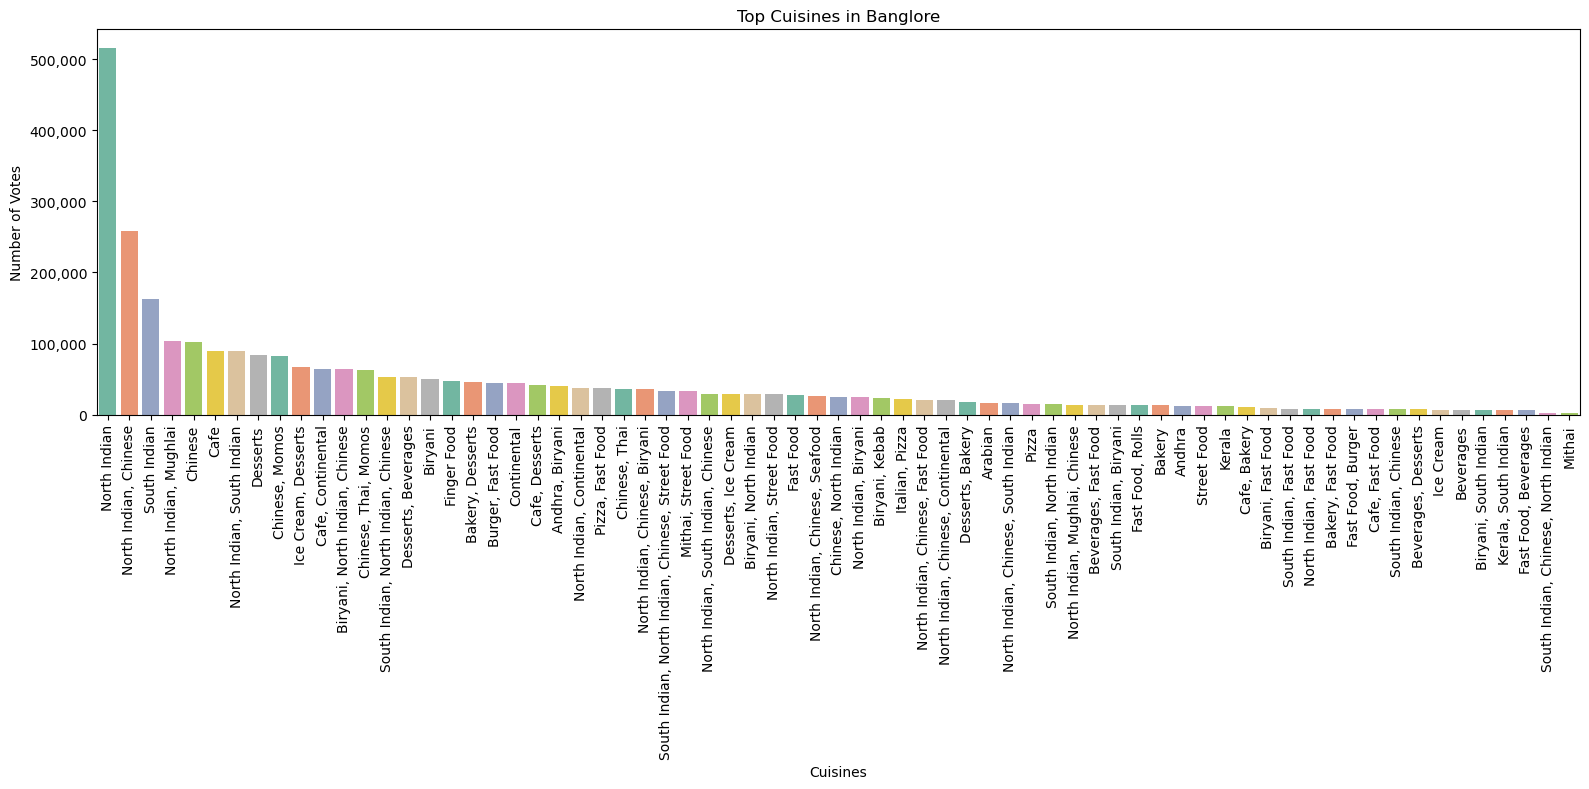

In [38]:
import matplotlib.ticker as mticker
data = df.groupby('cuisines')['votes'].sum().reset_index()
data = data.sort_values('votes', ascending=False)

data = data[data['cuisines'] != 'others']
plt.figure(figsize=(16,8))
sns.barplot(data=data, x='cuisines', y='votes', palette='Set2')
plt.title("Top Cuisines in Banglore")
plt.xlabel("Cuisines")
plt.ylabel("Number of Votes")
plt.tight_layout()
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


### 12) Average Rating per Cuisine vs Location

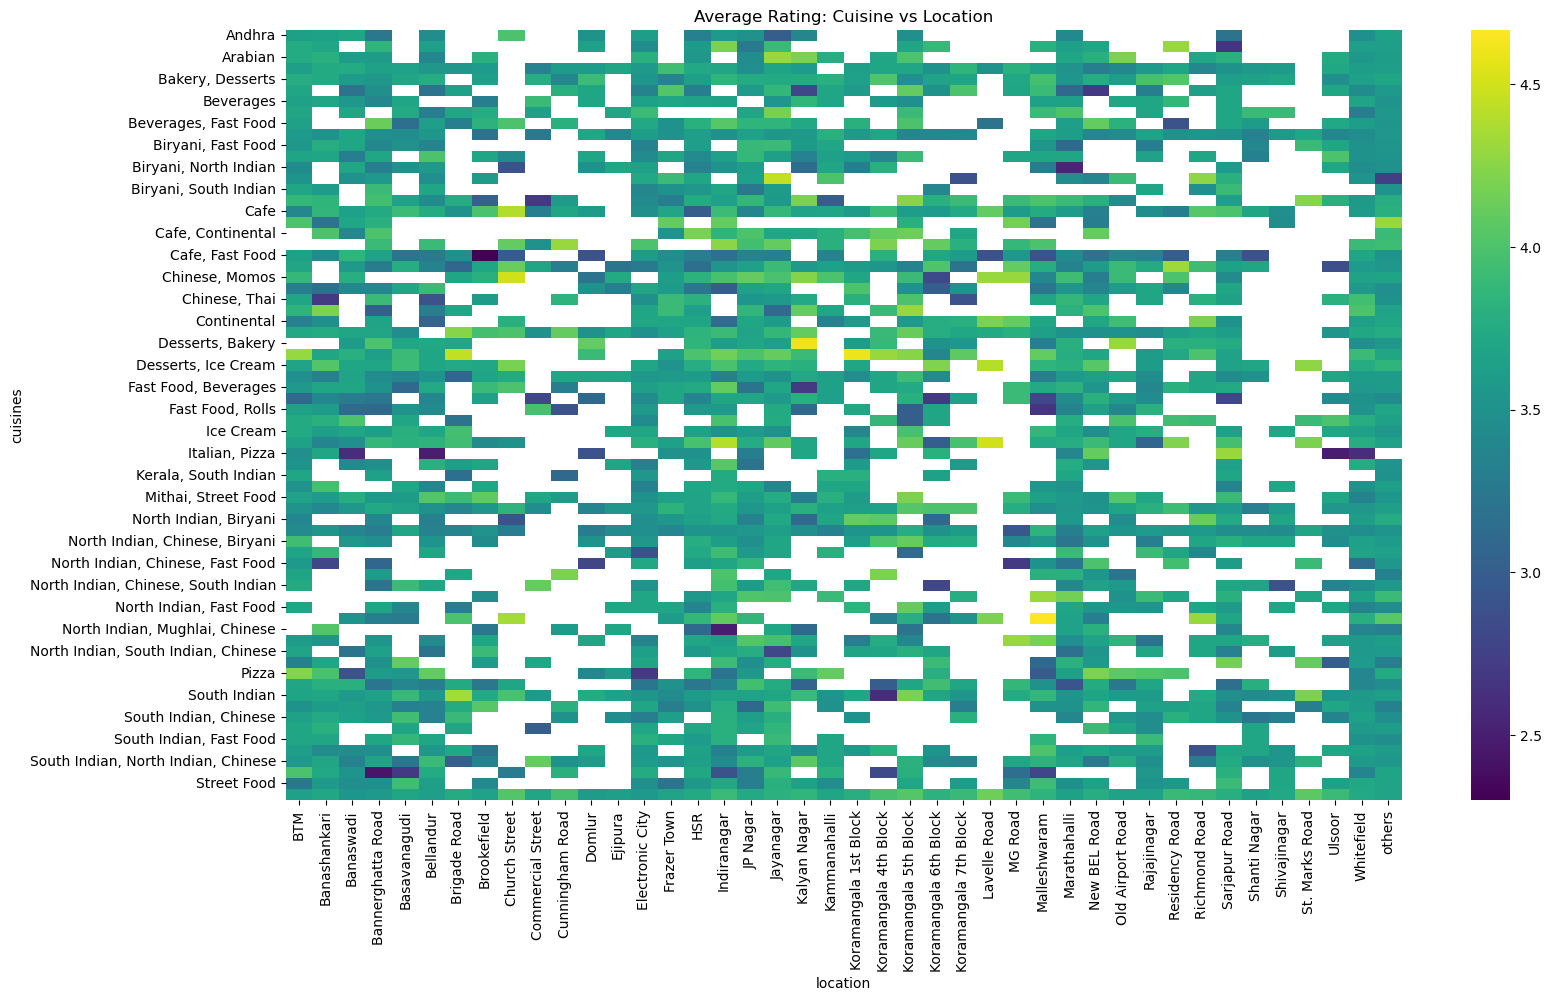

In [39]:
heat_data = df.pivot_table(values='rate', index='cuisines', columns='location', aggfunc='mean')
plt.figure(figsize=(18,10))
sns.heatmap(heat_data, cmap='viridis')
plt.title('Average Rating: Cuisine vs Location')
plt.show()

### 13) Distribution of Ratings

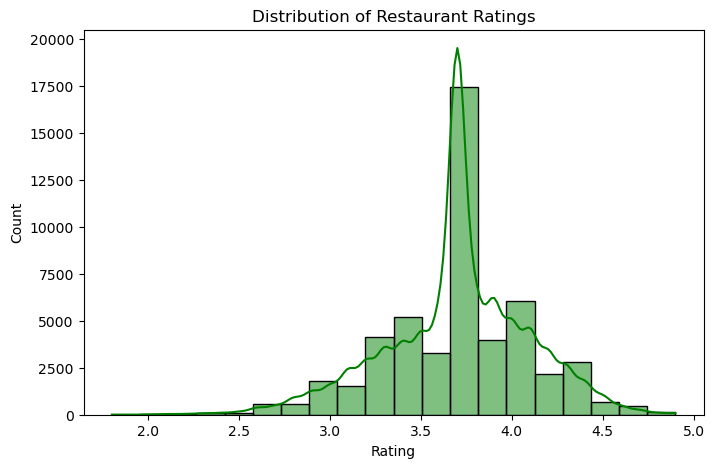

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df['rate'], bins=20, kde=True, color='green')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Key Insights from the Visualizations

**Location-Based Insights**
- Koramangala, BTM, and Indiranagar have the highest number of restaurants.
- Most restaurants offering online orders are concentrated in these top locations.
- Booking table facility is more common in high-end areas like Indiranagar and Koramangala.

**Cuisine-Based Insights**
- North Indian and Chinese are the most popular cuisines across Bangalore.
- Some cuisine combinations like "North Indian, Chinese" dominate vote counts.
- 'Others' category had negligible votes and was excluded from the final insights.

**Rating & Review Insights**
- Majority of restaurants have ratings between 3.0 and 4.5.
- Restaurants that offer both booking and online ordering tend to have higher ratings.
- Votes and ratings show a slight positive correlation — more popular places usually rated higher.

**Cost vs Votes**
- Average cost doesn’t directly affect the number of votes.
- Some mid-range restaurants with ₹300–₹600 cost have more votes than expensive ones.

**Visual Trends**
- Most charts showed that Bangalore's dining preferences are heavily location-driven.
- Online order and delivery services are a key driver of popularity.

These insights can help Zomato or restaurant owners understand what works best in different areas of Bangalore.

## Conclusion & Recommendations

### Conclusion:
This analysis of Zomato Bangalore data helped uncover key trends in customer preferences, restaurant types, location-wise demand, and online ordering behavior.

The city’s dining landscape is driven largely by:
- Location (Koramangala, BTM, Indiranagar dominate)
- Cuisine choices (North Indian, Chinese)
- Facilities like online ordering and table booking
- Customer engagement (votes, reviews, ratings)

We also discovered a correlation between online presence and higher votes, highlighting the importance of digital convenience.

---

### Recommendations:

1. **Restaurant Owners:**
   - Focus on delivery and online ordering setup.
   - Partner with Zomato for visibility in high-demand areas.
   - Offer combos of popular cuisines (e.g. North Indian + Chinese).
   - Maintain good customer service to drive higher ratings and votes.

2. **Zomato Product Team:**
   - Improve listing ranking for high-rated but less visible restaurants.
   - Introduce new filters: “Top Voted”, “Hidden Gems”, or “Most Booked”.
   - Run campaigns in under-represented locations.

3. **Customers:**
   - Use filters for cuisine + rating + online order to find the best fit.
   - Don’t ignore mid-range restaurants — they often outperform expensive ones.

---

This analysis lays the groundwork for more complex models such as **recommendation systems**, **sentiment analysis**, or **location-based restaurant suggestions**, which can be added in future versions of this project.